# Wholesale customers

In [19]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
df = pd.read_csv('./raw_data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df_information = {'FRESH': 'annual spending (m.u.) on fresh products (Continuous)',
                'MILK': 'annual spending (m.u.) on milk products (Continuous)',
                'GROCERY': 'annual spending (m.u.)on grocery products (Continuous)',
                'FROZEN': 'annual spending (m.u.)on frozen products (Continuous)',
                'DETERGENTS_PAPER': 'annual spending (m.u.) on detergents and paper products (Continuous)',
                'DELICATESSEN': 'annual spending (m.u.)on and delicatessen products (Continuous)',
                'CHANNEL': 'customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)',
                'REGION': 'customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)'}
df_information

{'FRESH': 'annual spending (m.u.) on fresh products (Continuous)',
 'MILK': 'annual spending (m.u.) on milk products (Continuous)',
 'GROCERY': 'annual spending (m.u.)on grocery products (Continuous)',
 'FROZEN': 'annual spending (m.u.)on frozen products (Continuous)',
 'DETERGENTS_PAPER': 'annual spending (m.u.) on detergents and paper products (Continuous)',
 'DELICATESSEN': 'annual spending (m.u.)on and delicatessen products (Continuous)',
 'CHANNEL': 'customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)',
 'REGION': 'customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)'}

## Data analysis

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [12]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [13]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [18]:
#check for duplicates

df.duplicated().sum()

0

In [60]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [45]:
random_clients = [291, 172, 14]

In [46]:
df_sales = df.drop(columns=['Channel', 'Region'])
df_sales

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


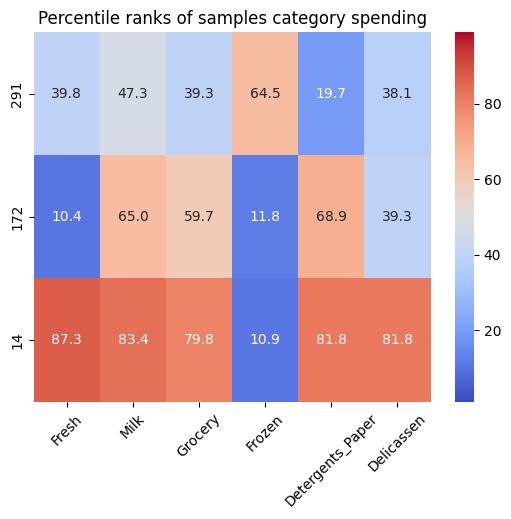

In [47]:
#percentile ranks

pcts = round(100 * df_sales.rank(axis=0, pct=True).iloc[random_clients],2)

sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='coolwarm')
plt.title('Percentile ranks of samples category spending')
plt.xticks(rotation=45, ha='center')
plt.show()

__Is the costumer purchasing some amount of one category somehow related to purchasing a proportional amount of other category products? We can easily check this with a supervised learning regression model with one feature removed and then score how well the model can predict the removed feature__

## First regression model - DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#define features and target
X = df_sales.drop(columns=['Grocery'])
y = df_sales[['Grocery']]

#define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#create a decision tree regressor
reg_model = DecisionTreeRegressor(random_state=42)

#fit the training set
reg_model.fit(X_train, y_train)

#get the score with the test set
score = reg_model.score(X_test, y_test)

print(score)

0.6779925253400161


## Feature prepocessing

### Feature distributions

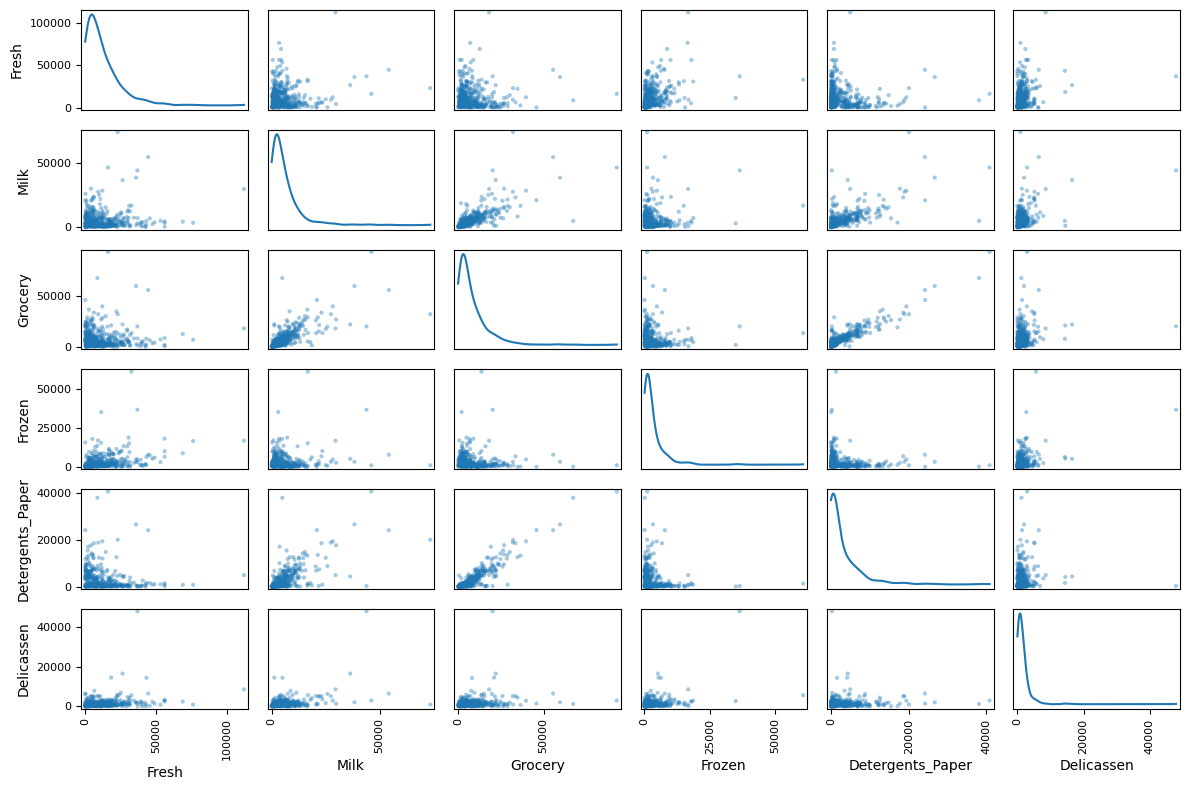

In [59]:
pd.plotting.scatter_matrix(df_sales, alpha=0.4, figsize=(12,8), diagonal='kde')
plt.tight_layout()

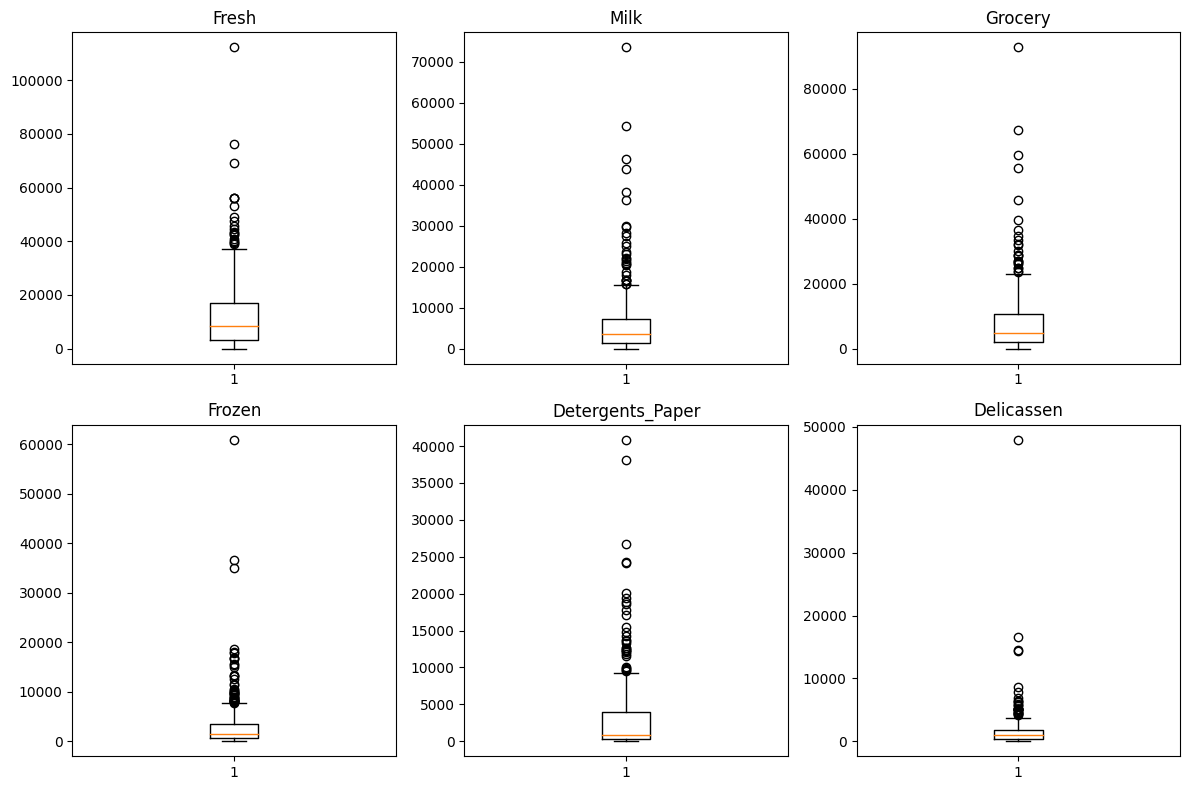

In [65]:
#check for outliers

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

for i, feature in enumerate(df_sales.columns):
    #select the current axis
    ax = axes.flatten()[i]
    
    ax.boxplot(df_sales[feature])
    
    ax.set_title(feature)

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

